In [1]:
import string
import graphlab
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

This non-commercial license of GraphLab Create for academic use is assigned to hagrawal@uh.edu and will expire on October 13, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1505430647.log


# Jokes data and user ratings, data cleaning

In [2]:
def clean_data():
    with open('data/jokes.dat') as f:
        text = f.read().lower().split('</p>')
        text = [line.replace('\r', '') for line in text]
        text = [line.replace('\n', '') for line in text]
        text = [line.replace('<br />', '') for line in text]
        text = [line.replace('<p>', '') for line in text]
        text = [line.replace('&quot;', '') for line in text]
        text = [line.replace('&#039;', '') for line in text]
        #text = [re.sub(" \d+", " ", line) for line in text]
        text = [line.split(':', 1)[-1] for line in text]
        #text = text[:150]
    return text

In [3]:
text = clean_data()
text[0]

'a man visits the doctor. the doctor says, i have bad news for you. you have cancer and alzheimers disease.the man replies, well, thank god i dont have cancer!'

In [6]:
user_ratings_train = pd.read_csv('data/ratings.csv', sep='\t')
user_ratings_test = pd.read_csv('data/test_ratings.csv', sep=',')
train_data = graphlab.SFrame(user_ratings)
test_data = graphlab.SFrame(test_ratings)

In [7]:
user_ratings_train.head(5)

,user_id,joke_id,rating
0,34888,111,-9.71875
1,49651,119,4.75000
2,29027,137,2.62500
3,25235,30,-2.43750
4,50499,19,2.18750


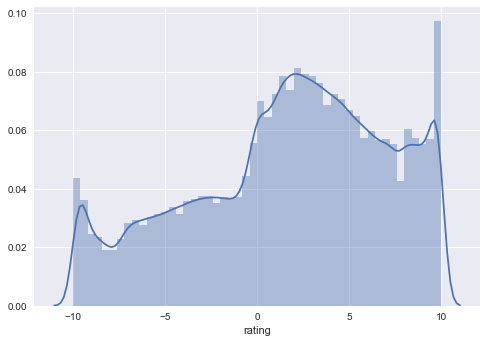

In [8]:
sns.distplot(user_ratings_train['rating'])

In [9]:
filter_good_rating = user_ratings_train[user_ratings_train.rating > 8]
jokes_good_rating = filter_good_rating.joke_id.unique()
[text[i-1] for i in jokes_good_rating][:5]

['did you hear that clinton has announced that there is a new national bird?the spread eagle.',
 'judy was having trouble with her computer, so she called tony, the computer guy, over to her desk. tony clicked a couple buttons and solved the problem. as he was walking away, judy called after him, so, what was wrong?and he replied, it was an id ten t error.a puzzled expression ran riot over judys face. an id ten t error? whats that...in case i need to fix it again?he gave her a grin...havent you ever heard of an id ten t error before?no, replied judy.write it down, he said, and i think youll figure it out.(she wrote...) i d 1 0 t',
 'the new employee stood before the paper shredder looking confused.need some help? a secretary asked.yes, he replied. how does this thing work?simple, she said, taking the fat report from his hand and feeding it into the shredder.thanks, but where do the copies come out?',
 'why are there so many joness in the phone book?because they all have phones.',
 'wha

In [10]:
filter_bad_rating = user_ratings_train[user_ratings_train.rating < -8]
jokes_bad_rating = filter_bad_rating.joke_id.unique()
jokes_bad_rating.max()
[text[i-1] for i in jokes_bad_rating][:5]

['a new business was opening and one of the owners friends wanted to send him flowers for the occasion. they arrived at the new business site and the owner read the card, rest in peace.the owner was angry and called the florist to complain.after he had told the florist of the obvious mistake and how angry he was, the florist replied, sir, im really sorry for the mistake, but rather than getting angry, you should imagine this: somewhere there is a funeral taking place today, and they have flowers with a note saying, congratulations on your new location!',
 'in a veterans day speech, president bush vowed, we will finish the mission. period. afterwards, he was advised that he doesnt have to read the punctuation marks.',
 'a boy comes home from school and tells his mother that he got a part in the school play. what part? the mother asks. i play a jewish husband, the boy replies.go back to school and tell your teacher that you want a speaking role!',
 'one day, three men went to a shrine to

In [11]:
user_ratings_train.joke_id.describe().T

count    1.218325e+06
mean     7.232423e+01
std      4.591434e+01
min      1.000000e+00
25%      2.300000e+01
50%      7.000000e+01
75%      1.140000e+02
max      1.510000e+02
Name: joke_id, dtype: float64

## See if there is a correlation between the length of the joke and its rating

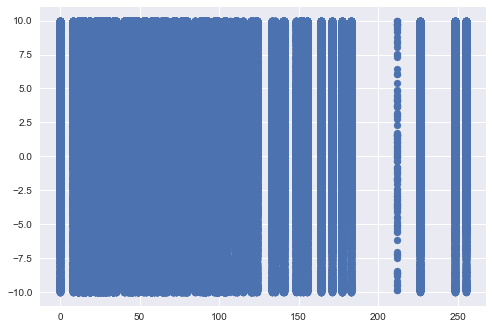

In [12]:
text = [line.translate(None, string.punctuation) for line in text]
length_joke_id = np.zeros(user_ratings.shape[0])
#length_joke_id = []
for i, joke_id in enumerate(list(user_ratings_train.joke_id)):
    length_joke_id[i] = len(text[joke_id - 1].split())
user_ratings_train['length_joke_id'] = length_joke_id
user_ratings_train.head()
plt.scatter(x=user_ratings_train.length_joke_id, y=user_ratings_train.rating)